### p73 선형 회귀 모델
- 데이터를 선형 함수로 모델링
- 최소제곱법 : 평균제곱오차를 최소화하는 파라미터를 찾는다
    - 파라미터를 줄이고 키우고를 반복한다(예시)
    - 오차를 파라미터로 미분한 값만큼 조절한다(경사하강법): 데이터 많을 때 사용
    - 정규방정식으로 찾기(데이터가 많아지면 메모리 부족으로 사용 불가)
- 평균제곱오차 : 오차(예측과 정답의 차이)를 제곱 > 모든 샘플들의 오차를 평균

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
# 키와 몸무게, 몸무게로부터 키를 예측해보자
몸무게 = [30,60,70,90]
키 = [120,160,170,190]
몸무게_test = [65,80] # 이 두사람의 키는 어떻게 될까?

In [12]:
# 4행 1열 / 1행 4열
몸무게 = np.array(몸무게).reshape((-1,1))
키 = np.array(키)
몸무게_test = np.array(몸무게_test).reshape((-1,1))

In [17]:
몸무게, 키

(array([[30],
        [60],
        [70],
        [90]]), array([120, 160, 170, 190]))

In [13]:
# p76 모델선택
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X=몸무게, y=키)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [15]:
몸무게_test, lr.predict(몸무게_test)

(array([[65],
        [80]]), array([162.93333333, 180.53333333]))

In [18]:
lr.score(몸무게, 키) # 결정계수 max 1

0.9928205128205129

In [19]:
# 계수 w와 절편 b, Y = wx + b = 1.17 * x + 86.6
lr.coef_, lr.intercept_

(array([1.17333333]), 86.66666666666667)

In [21]:
lr.coef_*몸무게+lr.intercept_ # Y = w * x + b

array([[121.86666667],
       [157.06666667],
       [168.8       ],
       [192.26666667]])

In [22]:
키

array([120, 160, 170, 190])

## =============================================

## LinearRefression 으로 내일의 종가 예측
- 입력(X: 하루 전 데이터), 출력(Y: 다음 날의 종가)
- 데이터 총 m =10, 학습용 8, 테스트용 2
- 정규화는 일단 생략

In [80]:
url = 'https://finance.daum.net/domestic/kospi200'
url = '코스피200 _ 다음 금융.html'  # 홈페이지 다른이름 저장
tables = pd.read_html(url, index_col=0)
len(tables)

3

In [81]:
df = tables[1]
df

,종가,전일비,등락률,거래량,거래대금,개인(억),외국인(억),기관(억)
일자,,,,,,,,
19.07.02,276.99,▼0.28,-0.10%,22361,817795,345,67,-391
19.07.01,277.27,▼0.23,-0.08%,74357,3446049,-214,1286,365
19.06.28,277.50,▼0.25,-0.09%,67598,2879563,-1802,3011,-1189
19.06.27,277.75,▲2.22,+0.81%,66303,3357666,-4165,1837,2415
19.06.26,275.53,▲0.25,+0.09%,58818,2636531,-712,157,557
19.06.25,275.28,▼0.30,-0.11%,60506,2635188,-364,277,-12
19.06.24,275.58,▲0.10,+0.04%,55539,2235175,-978,-1048,1966
19.06.21,275.48,▼0.53,-0.19%,77279,3275700,538,206,-767
19.06.20,276.01,▲0.70,+0.25%,55336,2417864,-1342,-434,1762


In [82]:
# 전일비와 등락률을 수치데이터로 변환
df['전일비'] = df['전일비'].replace('▼','-',regex=True)
df['전일비'] = df['전일비'].replace('▲','',regex=True)
df['등락률'] = df['등락률'].replace('%','',regex=True)

In [83]:
df['전일비'] = df['전일비'].astype(np.float)
df['등락률'] = df['등락률'].astype(np.float)

In [84]:
# min, max 정규화 [0,1]
minimum = np.min(df, axis =0)
maximum = np.max(df, axis =0)
df_norm = (df - minimum) / (maximum-minimum)

In [85]:
# X 와 y 를 분리
X = df_norm.iloc[1:] # 오늘 데이터 제외
y = df_norm.iloc[:-1,0] # 가장 오래된 데이터와 조가 외의 컬럼 제외
X.shape, y.shape

((9, 8), (9,))

In [86]:
# Train/ Test 용 분리
from sklearn.model_selection import train_test_split
offset = 2
X_train = X[offset:] # 예전
X_test = X[:offset] # 최근
y_train = y[offset:] # 예전
y_test = y[:offset] # 최근

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [95]:
'''
Train 으로 Linear Regression 모델 fit
p78 릿지(ridge) 모델 : w를 가능한한 작게 만드는 LinearRegression
    규제(regularization) - Lasso : L1(abs), Ridge : L2(sqare)
    라쏘 
W를 줄인다는 것은 Y를 예측하는 데 가능한한 모든 특성을 반영해라(모든 특성을 다방면으로 살펴봐라)
Y = w1 * x1 + w2 * x2 + ..... + wi * xi +b
'''
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#lr = LinearRegression().fit(X_train, y_train)
lr = Ridge().fit(X_train, y_train)
#lr = Ridge(alpha = 1.0).fit(X_train, y_train)

In [88]:
# Score 측정, LR -2만점, Ridge -14점
# Linear regression : train 굿, 테스트 bad : 과적합 Overfitting
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.2529337904423953, -14.132673454873197)

In [94]:
lr.coef_
np.sum(lr.coef_)

0.3433965366361048

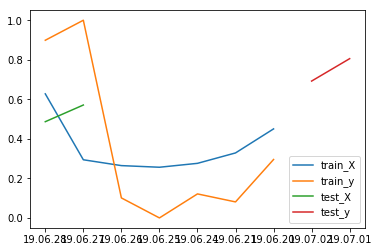

In [89]:
# 예측을 그래프로 시각화
train_len = np.arange(len(X_train))
test_len = np.arange(len(X_train), len(X_train)+len(X_test))
m = plt.plot(lr.predict(X_train), label = 'train_X')
m = plt.plot(y_train, label = 'train_y')
m = plt.plot(lr.predict(X_test), label = 'test_X')
m = plt.plot(y_test, label = 'test_y')
plt.legend()

## =====================================

In [98]:
f = '기간별환율_20190702.csv'  # 홈페이지 다른이름 저장
df = pd.read_csv(f, encoding = 'cp949')
df.shape

(495, 9)

In [99]:
df.head()

,일자,송금,Unnamed: 2,현찰,Unnamed: 4,T/C사실때,매매기준율,한국은행기준율,대미환산율
0,NaN,보내실때,받으실때,사실때,파실때,NaN,(전일대비),NaN,NaN
1,2019.07.02,"1,087.53","1,066.65","1,095.93","1,058.25","1,090.01/td>","1,077.09","1,066.80",0.92
2,NaN,NaN,NaN,NaN,NaN,NaN,상승2.87,NaN,NaN
3,2019.07.01,"1,084.63","1,063.81","1,093.01","1,055.43","1,087.11/td>","1,074.22","1,066.74",0.92
4,NaN,NaN,NaN,NaN,NaN,NaN,상승1.42,NaN,NaN


#### 데이터 정제(refinement)

In [102]:
f = '기간별환율_20190702.csv'  # 홈페이지 다른이름 저장
df = pd.read_csv(f, encoding = 'cp949', index_col=0, header=1)
df.head()

,보내실때,받으실때,사실때,파실때,Unnamed: 5,(전일대비),Unnamed: 7,Unnamed: 8
2019.07.02,"1,087.53","1,066.65","1,095.93","1,058.25","1,090.01/td>","1,077.09","1,066.80",0.92
NaN,NaN,NaN,NaN,NaN,NaN,상승2.87,NaN,NaN
2019.07.01,"1,084.63","1,063.81","1,093.01","1,055.43","1,087.11/td>","1,074.22","1,066.74",0.92
NaN,NaN,NaN,NaN,NaN,NaN,상승1.42,NaN,NaN
2019.06.28,"1,083.20","1,062.40","1,091.57","1,054.03","1,085.67/td>","1,072.80","1,073.35",0.92


In [113]:
df4 = df.iloc[:,:4]

In [114]:
df4.tail()

,보내실때,받으실때,사실때,파실때
2018.07.03,"1,014.98",995.48,"1,022.82",987.64
NaN,NaN,NaN,NaN,NaN
2018.07.02,"1,020.55","1,000.95","1,028.43",993.07
NaN,NaN,NaN,NaN,NaN
2018.06.29,"1,015.36",995.86,"1,023.20",988.02


In [131]:
df4 = df4.dropna() # NaN 하나라도 있으면 그 행을 버린다

#### 전처리 (문자 -> 숫자)

In [132]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2019.07.02 to 2018.06.29
Data columns (total 4 columns):
보내실때    248 non-null float64
받으실때    248 non-null float64
사실때     248 non-null float64
파실때     248 non-null float64
dtypes: float64(4)
memory usage: 9.7+ KB


In [133]:
df4 = df4.replace(',', '', regex = True)
df4 = df4.astype(np.float)
df4.head()

,보내실때,받으실때,사실때,파실때
2019.07.02,1087.53,1066.65,1095.93,1058.25
2019.07.01,1084.63,1063.81,1093.01,1055.43
2019.06.28,1083.20,1062.40,1091.57,1054.03
2019.06.27,1082.90,1062.10,1091.26,1053.74
2019.06.26,1086.17,1065.31,1094.56,1056.92


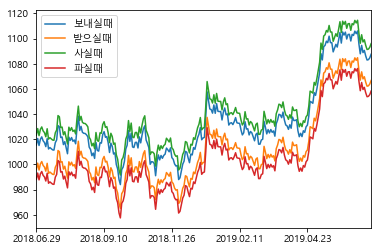

In [134]:
plt.rc('font',family = 'Malgun Gothic')
df4.iloc[::-1].plot()

In [135]:
f = '8.8.1.1 주요국통화의 대원화.xls'  # 홈페이지 다른이름 저장
df = pd.read_excel(f, encoding = 'cp949', index_col=0, header=3)
df.head()

WARNING *** file size (48256) not 512 + multiple of sector size (512)


,원자료,원자료.1
변환,,
2018/06/29,1121.7,1014.79
2018/06/30,NaN,NaN
2018/07/01,NaN,NaN
2018/07/02,1117.2,1009.26
2018/07/03,1117.4,1008.26


In [136]:
df1 = df.dropna()

In [137]:
df1.head()

,원자료,원자료.1
변환,,
2018/06/29,1121.7,1014.79
2018/07/02,1117.2,1009.26
2018/07/03,1117.4,1008.26
2018/07/04,1121.1,1014.34
2018/07/05,1115.3,1009.55


In [138]:
df1.columns = ['미국달러','일본엔']

In [139]:
df1.head()

,미국달러,일본엔
변환,,
2018/06/29,1121.7,1014.79
2018/07/02,1117.2,1009.26
2018/07/03,1117.4,1008.26
2018/07/04,1121.1,1014.34
2018/07/05,1115.3,1009.55


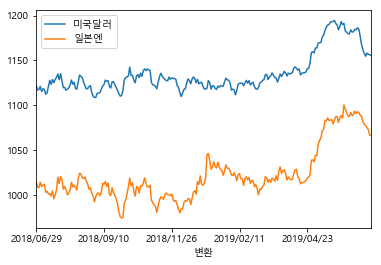

In [140]:
df1.plot()

In [145]:
window_weak = 4
window_day = window_weak * 5 # 5일
predict_day = 5
window_day

20

X, Y 갯수
- 데이터가 30개 있으면? 20개로부터 5일 예측하므로 (20+5) =1샘플, 총 5샘플
- 현재 데이터 248개 샘플, 총 224 쌍의 X, Y를 만들어야 합니다.
- X[224, 2 * 20], y[224, 2 * 5]

In [146]:
len(df1), window_day + predict_day, len(df1)-(window_day+predict_day)

(248, 25, 223)

In [149]:
offset = window_day +predict_day -1
offset, len(df1)-offset

(24, 224)

In [154]:
before = df1.iloc[:-predict_day] # 최근 데이터 24개 빼고
later = df1.iloc[window_day:] # 과거 데이터 24개 빼고
before.shape, later.shape

((243, 2), (228, 2))

In [155]:
m = len(df1) - (predict_day + window_day - 1)
m

224

In [160]:
x_list = []
y_list = []
for i in range(m):
    x = df1.iloc[i:i+window_day] # 20일간의 데이터
    y = df1.iloc[i+window_day:i+window_day+predict_day] # 그 다음 5일간의 데이터
    x_list.append(x.values) # 날짜 인덱스 빼고 값만 저장
    y_list.append(y.values)

In [161]:
len(x_list)

224

In [163]:
X = np.array(x_list)
y = np.array(y_list)
X.shape, y.shape # (m-instance, day, columns:특징수(달러, 엔화))

((224, 20, 2), (224, 5, 2))

In [164]:
X = np.reshape(X,[m,-1])
y = np.reshape(y,[m,-1])
X.shape, y.shape # (달러, 엔화, 달러, 엔화 ...)

((224, 40), (224, 10))

In [167]:
# train / test 분리
offset = 30
X_train = X[offset:]
X_test = X[:offset]
y_train = y[offset:]
y_test = y[:offset]
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((194, 40), (30, 40), (194, 10), (30, 10))

In [172]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#lr = LinearRegression().fit(X_train, y_train)
lr = Ridge().fit(X_train, y_train)
#lr = Ridge(alpha = 1.0).fit(X_train, y_train)

In [173]:
lr = LinearRegression().fit(X_train, y_train)

In [174]:
lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.9205409567677935, -0.6547522365360025)

In [187]:
최근20일데이터 = df1.iloc[-window_day:]
최근20일데이터.shape

(20, 2)

In [189]:
# 미래의 5일 환율 예측을 그래프로 시각화
최근20일데이터 = df1.iloc[-window_day:].values.reshape([1,-1])
미래의5일예측 = lr.predict(최근20일데이터)
미래의5일예측 = np.reshape(미래의5일예측, [predict_day, 2]) # 다시 3차원으로 변환
미래의5일예측.shape

(5, 2)

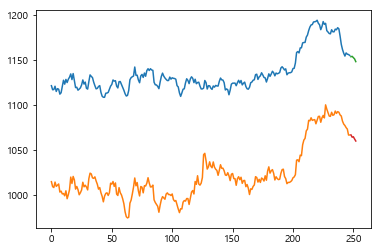

In [193]:
usa = df1.iloc[:,0].values
japan = df1.iloc[:,1].values

x_num = np.arange(len(usa))
x1_num = np.arange(len(usa),len(usa)+len(미래의5일예측))

#plt.plot(usa)
#plt.plot(japan)
plt.plot(x_num, usa)
plt.plot(x_num, japan)
plt.plot(x1_num, 미래의5일예측[:,0])
plt.plot(x1_num, 미래의5일예측[:,1])